In [1]:
# compare all methods on sklearn mooooooons
import sys

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/gmm', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import pickle
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import tuts.bhmm.plot_hmm as plot_hmm
reload(plot_hmm)

<module 'tuts.bhmm.plot_hmm' from '/Users/david/Documents/mastersCode/ubm/tuts/bhmm/plot_hmm.py'>

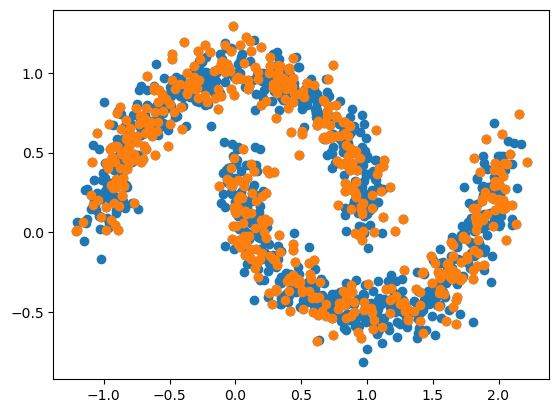

In [3]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(1200, noise=0.1, random_state=0)
Xmoon = Xmoon
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

Xmoon = np.copy(Xmoon[:600])
Xmoon_test = np.copy(Xmoon[-500:])
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1])

In [71]:
import math
import final.models.gmm.bgmm.bgmm as bgmm
reload(bgmm)

def get_magnitude(number, mult=0):
    # Handle the case where the number is 0 separately
    if number == 0:
        return 0

    # Calculate the magnitude using the logarithm
    magnitude = int(math.floor(math.log10(abs(number)))) + mult

    # Adjust the result to match the scientific notation format
    return 10**magnitude

# my_bgmm = bgmm.GMMGibbsSampler(Xmoon, 30, alpha0=1, Z_true=ymoon[:600], iterations=2000,
#                                verbose=True)

# my_bgmm.nu0 = 4
# my_bgmm.alpha0 = 10
# my_bgmm.V0 = np.eye(2) * get_magnitude(my_bgmm.S0[0,0], 1)
# my_bgmm.S0 = np.eye(2) * get_magnitude(my_bgmm.S0[0,0])
# print(my_bgmm.V0)
# print(my_bgmm.S0)
# my_bgmm.V0 = np.eye(2) * get_magnitude(my_bgmm.S0[0,0])
# plot_hmm.plot_hmm_data(Xmoon, ymoon, my_bgmm.K, my_bgmm.mu, my_bgmm.sigma)

In [73]:
import time
alpha_vals = [250,750,1000,1500]
results_dict = {}
for alpha_val in alpha_vals:
    my_bgmms = []
    my_bgmms_like = []
    my_bgmms_n_comps = []
    start = time.time()
    for i in range(1):
        print('bgm no: ', i)
        my_bgmm = bgmm.GMMGibbsSampler(Xmoon, K=50, alpha0=alpha_val, Z_true=ymoon[:600], iterations=1000, verbose=False)
        my_bgmm.fit()
        my_bgmms_like.append(my_bgmm.calculate_likelihood_on_test_data(Xmoon_test))
        my_bgmms_n_comps.append(my_bgmm.nk)
        my_bgmms.append(my_bgmm)
    end = time.time()
    results_dict[alpha_val] = [my_bgmms, my_bgmms_like, my_bgmms_n_comps]
    print('total time: ', end - start, 'for alpha0: ', alpha_val)
print('complete')

bgm no:  0
init ari 0.034
starting gibbs sampling
total time:  15.338213920593262 for alpha0:  250
bgm no:  0
init ari 0.034
starting gibbs sampling
total time:  24.243829011917114 for alpha0:  750
bgm no:  0
init ari 0.035
starting gibbs sampling
total time:  27.30372977256775 for alpha0:  1000
bgm no:  0
init ari 0.036
starting gibbs sampling
total time:  28.702459812164307 for alpha0:  1500
complete


In [42]:
means_std_lik = []
for alpha in results_dict:
    means_std_lik.append(np.mean(np.array(results_dict[alpha][1]), axis=0), )
means_std_lik = np.array(means_std_lik)

In [168]:
my_bgmm = my_bgmms[0]

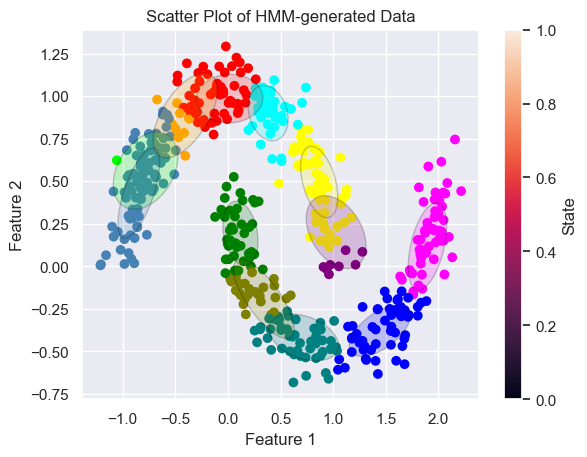

(-1.1602071431582348, 0.505446564117796, -580.1035715791174)


In [169]:
from tuts.bhmm.plot_hmm import plot_hmm_data
plot_hmm_data(Xmoon_test, my_bgmm.gmm.predict(Xmoon_test), my_bgmm.K, my_bgmm.mu, my_bgmm.sigma)
print(my_bgmm.calculate_likelihood_on_test_data(Xmoon_test))

In [19]:
import math
import final.models.gmm.ibgmm.ibgmm as ibgmm
reload(ibgmm)
import tuts.bhmm.plot_hmm as plot_hmm
reload(plot_hmm)

my_ibgmm = ibgmm.InfiniteGMMGibbsSampler(Xmoon, K=5, alpha0=1, Z_true=ymoon[:600], iterations=500)
# my_bgmm.nu0 = 4
# my_bgmm.alpha0 = 10
# my_ibgmm.V0 = np.eye(2) * get_magnitude(my_ibgmm.S0[0,0], 1)
# my_bgmm.S0 = np.eye(2) * get_magnitude(my_bgmm.S0[0,0], 0)
print(my_ibgmm.V0)
print(my_ibgmm.S0)
print(my_ibgmm.nu0)
print(my_ibgmm.m0)
print(my_ibgmm.alpha0)
# my_ibgmm.fit()

init ari 0.219
[[1. 0.]
 [0. 1.]]
[[0.78405318 0.        ]
 [0.         0.24881268]]
4
[0.48504663 0.27354193]
1


In [44]:
import time
alpha_vals = [250,750,1500]
results_dict = {}
for alpha_val in alpha_vals:
    my_ibgmms = []
    my_ibgmms_like = []
    my_ibgmms_n_comps = []
    start = time.time()
    for i in range(2):
        print('bgm no: ', i)
        my_ibgmm = ibgmm.InfiniteGMMGibbsSampler(Xmoon, K=10, alpha0=alpha_val, Z_true=ymoon[:600], iterations=500, verbose=False)
        my_ibgmm.fit()
        my_ibgmms_like.append(my_ibgmm.calculate_likelihood(Xmoon_test, True))
        my_ibgmms_n_comps.append(my_ibgmm.nk)
        my_ibgmms.append(my_ibgmm)
    end = time.time()
    results_dict[alpha_val] = [my_ibgmms, my_ibgmms_like, my_ibgmms_n_comps]
    print('total time: ', end - start, 'for alpha0: ', alpha_val)
print('complete')

bgm no:  0
init ari 0.126
starting gibbs sampling


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


bgm no:  1
init ari 0.136
starting gibbs sampling


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


total time:  138.67418336868286 for alpha0:  250
bgm no:  0
init ari 0.125
starting gibbs sampling


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


bgm no:  1
init ari 0.126
starting gibbs sampling


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


total time:  143.71484899520874 for alpha0:  750
bgm no:  0
init ari 0.131
starting gibbs sampling


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


bgm no:  1
init ari 0.135
starting gibbs sampling
total time:  145.34639525413513 for alpha0:  1500
complete


/Users/david/.conda/envs/ubm/lib/python3.10/site-packages/numpy/lib/function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [45]:
means_std_lik = []
for alpha in results_dict:
    means_std_lik.append(np.mean(np.array(results_dict[alpha][1]), axis=0), )
means_std_lik = np.array(means_std_lik)

(-1.129397590688382, 0.5724247105020838, -677.6385544130292)


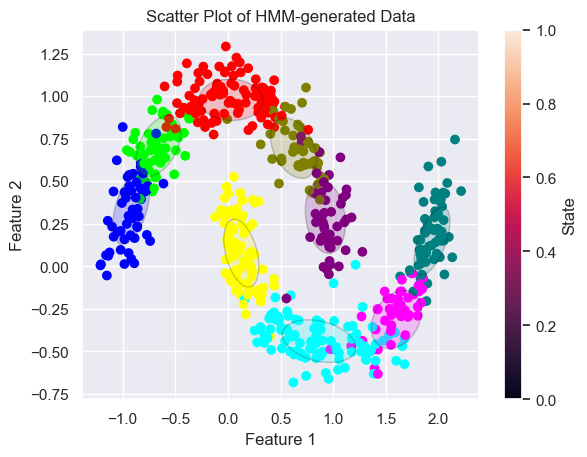

(-1.1401463857039456, 0.587430769669079, -570.0731928519727)


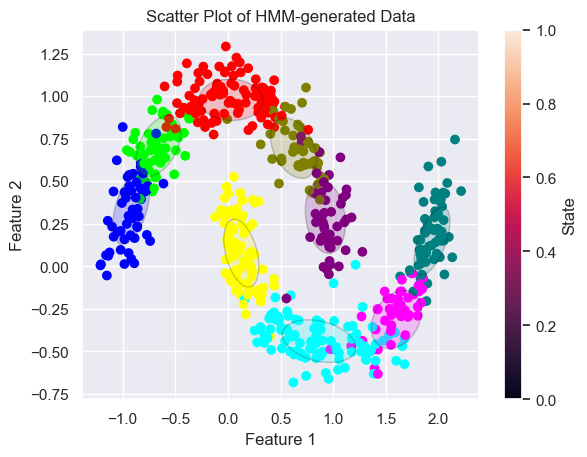

In [162]:
from sklearn import mixture

my_ibgmm = my_ibgmms[0]
print(my_ibgmm.calculate_likelihood(test_data=Xmoon, use_gmm=True))
my_ibgmm.plot()

print(my_ibgmm.calculate_likelihood(test_data=Xmoon_test, use_gmm=True))
my_ibgmm.plot()
# my_ibgmm_trace: mixture.GaussianMixture = my_ibgmms[0].gmm
# score = my_ibgmm_trace.score_samples(Xmoon)
# print(score)
# my_ibgmm_trace.n_components
# print(my_ibgmm.calculate_likelihood_on_test_data(Xmoon))

starting gibbs sampling
it:  0  likelihood:  -700.1702309573523  counts: 8


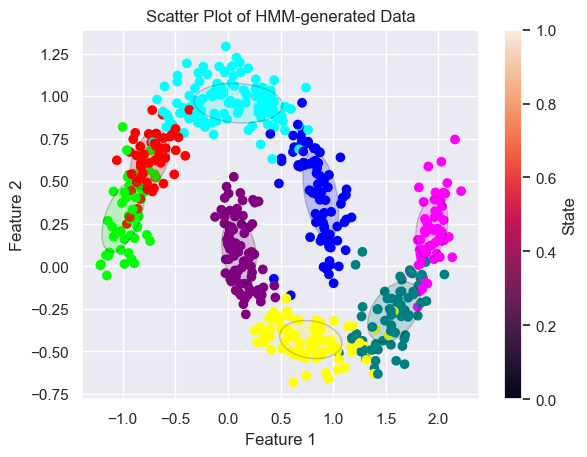

it:  0  counts:  [ 84  48  52 123  60  77  84  72]


In [137]:
my_ibgmm.alpha0 = 1
my_ibgmm.iterations = 10
my_ibgmm.fit()

(-1.1551764216858755, 0.6479784821303337, -693.1058530115253)


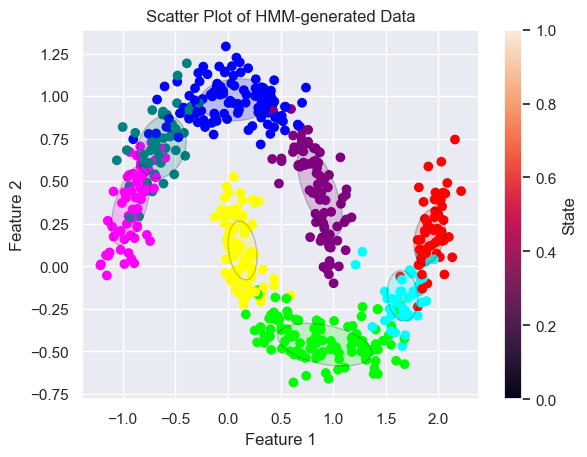

In [142]:
print(my_ibgmm.calculate_likelihood_on_test_data(Xmoon_test, cutoff=1))
my_ibgmm.plot()
# (-1.7052077317903684, 1.7640641477064865, -1023.124639074221)
# (-1.1418677854814507, 0.5592435632720106, -685.1206712888704)

In [16]:
my_ibgmms_like = []
my_ibgmms_n_comps = []
cutoff = 0.95
for i in range(2):
    print('bgm no: ', i)
    my_ibgmms_like.append(my_ibgmm.calculate_likelihood_on_test_data(Xmoon_test, cutoff))
    my_ibgmms_n_comps.append(len(my_ibgmm.get_n_largest_components(cutoff)))

bgm no:  0
bgm no:  1


In [74]:
from sklearn.mixture import BayesianGaussianMixture
random_state = 2
rng = np.random.RandomState(random_state)

In [78]:
from scipy.stats import multivariate_normal
import time

def calculate_likelihood_on_test_data(test_data, my_model:BayesianGaussianMixture ):
    likelihood = []
    for i in range(len(test_data)):
        point_likelihood = 0.0
        for k in range(my_model.n_components):
            component_likelihood = my_model.weights_[k] * multivariate_normal.pdf(test_data[i], mean=my_model.means_[k], cov=my_model.covariances_[k])
            point_likelihood += component_likelihood
        likelihood.append(np.log(point_likelihood))  # Use log likelihood to avoid numerical underflow
    return np.mean(likelihood), np.std(likelihood), np.sum(likelihood)

alpha_vals = [1,5,10,50,100,250,500,750,1000,1500]
results_dict = {}
for alpha_val in alpha_vals:
    models = []
    models_like = []
    models_n_comps = []
    start = time.time()
    for i in range(2):
        print('bgm no: ', i)
        my_vibgm = BayesianGaussianMixture(
            weight_concentration_prior_type="dirichlet_process", #"dirichlet_distribution process",
            n_components=50,
            reg_covar=0,
            init_params="kmeans",
            max_iter=1500,
            mean_precision_prior=1,
            random_state=random_state,
            weight_concentration_prior=alpha_val,
            degrees_of_freedom_prior=4
        )
        my_vibgm.fit(Xmoon)
        models_like.append(calculate_likelihood_on_test_data(Xmoon_test, my_vibgm))

        z_test = my_vibgm.predict(Xmoon_test)
        unique_elements, counts = np.unique(z_test, return_counts=True)
        models_n_comps.append(np.where(counts > 1)[0])

        # min_weight = np.min(my_vibgm.weight_concentration_) + 0.25 * np.std(my_vibgm.weight_concentration_)
        # n_components = len(np.where(my_vibgm.weight_concentration_ > min_weight)[0])
        # print('n_components', n_components)
        # models_n_comps.append(n_components)
        models.append(my_vibgm)
    end = time.time()
    results_dict[alpha_val] = [models, models_like, models_n_comps]
    print('total time: ', end - start, 'for alpha0: ', alpha_val)
print('complete')

bgm no:  0
bgm no:  1
total time:  3.1035711765289307 for alpha0:  1
bgm no:  0
bgm no:  1
total time:  2.9971840381622314 for alpha0:  5
bgm no:  0
bgm no:  1
total time:  3.081169843673706 for alpha0:  10
bgm no:  0
bgm no:  1
total time:  3.2284798622131348 for alpha0:  50
bgm no:  0
bgm no:  1
total time:  3.4727230072021484 for alpha0:  100
bgm no:  0
bgm no:  1
total time:  3.1972169876098633 for alpha0:  250
bgm no:  0
bgm no:  1
total time:  3.3787178993225098 for alpha0:  500
bgm no:  0
bgm no:  1
total time:  3.383333921432495 for alpha0:  750
bgm no:  0
bgm no:  1
total time:  3.3970470428466797 for alpha0:  1000
bgm no:  0
bgm no:  1
total time:  3.3777008056640625 for alpha0:  1500
complete


In [80]:
means_std_lik = []
for alpha in results_dict:
    means_std_lik.append(np.mean(np.array(results_dict[alpha][1]), axis=0))
means_std_lik = np.array(means_std_lik)

alpha_vals:  100


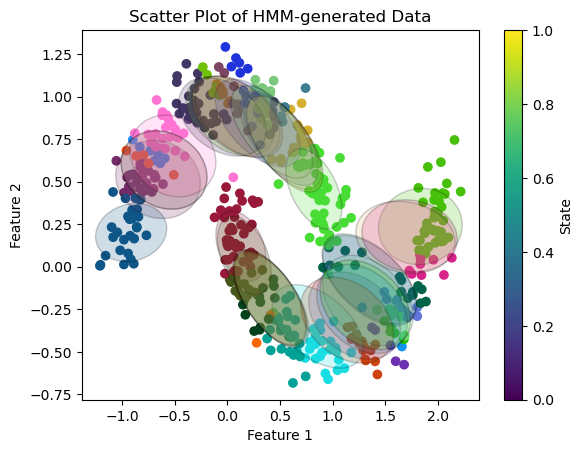

18

In [66]:
from tuts.bhmm.plot_hmm import plot_hmm_data
alpha_index = 4
print('alpha_vals: ', alpha_vals[alpha_index])
my_vi_bgmm:BayesianGaussianMixture = results_dict[alpha_vals[alpha_index]][0][0]
plot_hmm_data(Xmoon_test, my_vi_bgmm.predict(Xmoon_test), my_vi_bgmm.n_components, my_vi_bgmm.means_, my_vi_bgmm.covariances_)
z_test = my_vi_bgmm.predict(Xmoon_test)
unique_elements, counts = np.unique(z_test, return_counts=True)
len(np.where(counts > 10)[0])

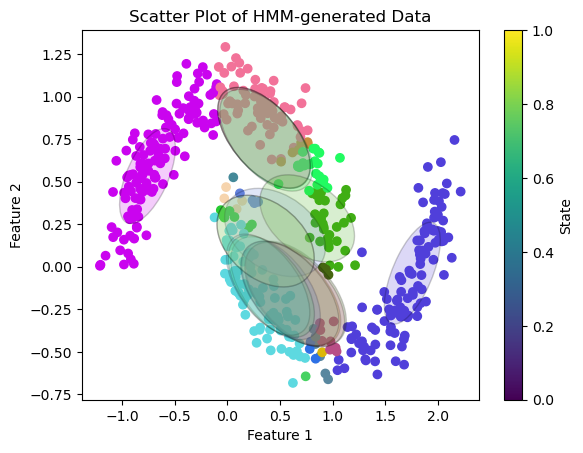

In [9]:
# print(my_bgmm.calculate_likelihood_on_test_data(Xmoon_test))